In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import random

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import collections

In [185]:
# Remove the outliers
def remove_outliers(file_path):
    # return the list of dataframes
    dataframe_lists = []
    # Creating the dataframe and selecting the required columns
    for i in range(64):
        df = pd.read_csv(file_path, usecols=[1,2,3,4], skiprows=i*72000, nrows = 72000, names=["lz","X","Y","Z"])
        df['radiusSquare'] = df['X']*df['X']+df['Y']*df['Y']+df['Z']*df['Z']
        df['radius'] = np.sqrt(df['radiusSquare']).round(1)
        df['freq'] = df.groupby(['lz','radius'])['radius'].transform('count')
        for j in range(64):
            maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
            while maxfreq>100:
                df.drop(df[(df['lz']==j) & (df['freq']==maxfreq)].index, inplace=True)
                maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
                df.drop(df[(df['lz']==j) & (df['radius']==0)].index, inplace=True)
        dataframe_lists.append(df.iloc[:,1:4])
    return dataframe_lists

In [186]:
# atm = remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_initial_dataset/Atm/in.csv")

# This the second data set that contains multiple objects
allData= remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_dataset2/in.csv")


mX=np.array(allData[0]['X'])
mY=np.array(allData[0]['Y'])
mZ=np.array(allData[0]['Z'])




In [187]:
DataForClustering =  np.array(list(zip(mX, mY, mZ))) 

clustering = DBSCAN(eps=1, min_samples=10).fit(DataForClustering)

labels = clustering.labels_


labels = labels +1 

print(max(labels))
print(min(labels))

38
0


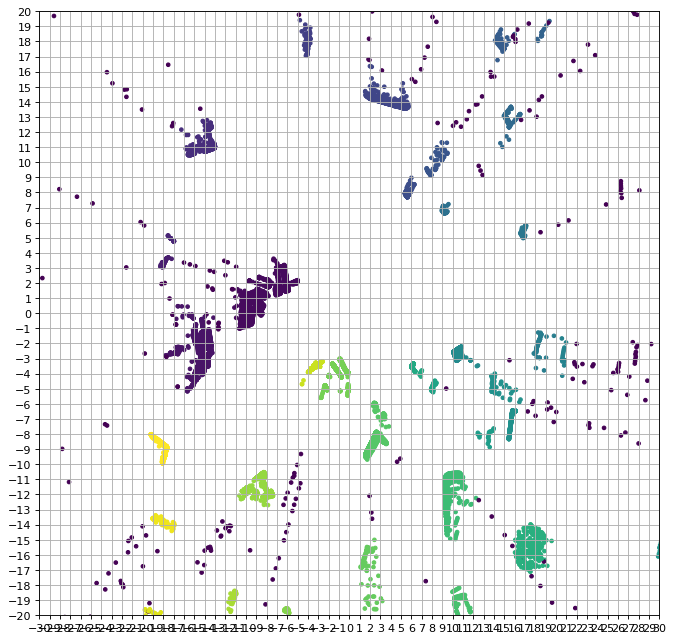

In [188]:
grid_size= 1
#fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
fig = plt.figure(figsize=(10, 10), dpi= 80)
ax = fig.gca()

ax.set_xticks(np.arange(-120, 120, grid_size))
ax.set_yticks(np.arange(-120, 120, grid_size))
# plt.grid()

plt.scatter(allData[0]['Z'], allData[0]['X'], s=10,  c=labels)
plt.xlim(-30, 30)
plt.ylim(-20, 20)
plt.grid()
plt.show()

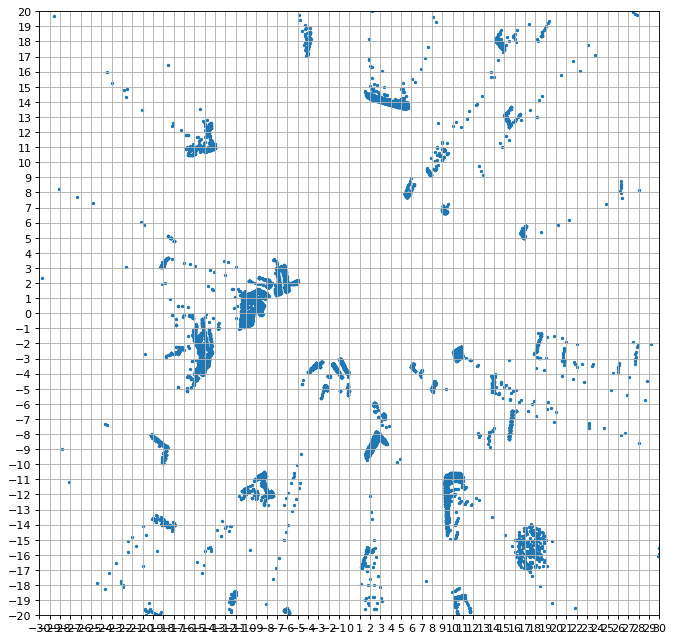

In [189]:
grid_size= 1
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.gca()
ax.set_xticks(np.arange(-120, 120, grid_size))
ax.set_yticks(np.arange(-120, 120, grid_size))
# plt.grid()
plt.scatter(allData[0]['Z'], allData[0]['X'], s=4)
plt.xlim(-30, 30)
plt.ylim(-20, 20)
plt.grid()
plt.show()

In [190]:
def isInt(value):
    try:
        int(value)
        return True
    except:
        return False


numOfObjects = []

# Out put data.
# We need to get the number of objects. 
pathOutput="/home/kia/Collected-Datasets/DEBS2019/debs2019_dataset2/out.csv"

with open(pathOutput) as fp:  
   line = fp.readline()
   cnt = 1
   while line:
    # print("Line {}: {}".format(cnt, line.strip()))
        lineArr=line.split(",")
        num = 0
        for index in range(1, len(lineArr)):
            if(isInt(lineArr[index])):
               num +=int(lineArr[index])
        numOfObjects.append(num)
        #print(line.split(",")[1])
        line = fp.readline()
        cnt += 1
        
        
        
print(max(numOfObjects))

aList=np.array(numOfObjects)
print(np.mean(aList))
print(np.median(aList))

50
29.186
29.0


In [233]:
# clustering with DBSCAN 
def doClusteringWithDBSCAN(data):
    
    clustering = DBSCAN(eps=1, min_samples=16).fit(data)

    labels = clustering.labels_

    labels = labels +1 
    
    return max(labels)

In [235]:
# run a test. 

sum = 0 
for i in range(64):
    data =  np.array(list(zip(np.array(allData[i]['X']), np.array(allData[i]['Y']), np.array(allData[i]['Z'])))) 
   
    
    numberOfClusters = doClusteringWithDBSCAN(data)
    print("Number Of Clusters: ", numberOfClusters, ", Difference is: ", numOfObjects[i] - numberOfClusters)
    
    sum = sum + (abs(numOfObjects[i] - numberOfClusters))
    

print(sum)
    
    

Number Of Clusters:  32 , Difference is:  1
Number Of Clusters:  26 , Difference is:  -1
Number Of Clusters:  28 , Difference is:  -3
Number Of Clusters:  17 , Difference is:  0
Number Of Clusters:  20 , Difference is:  -4
Number Of Clusters:  35 , Difference is:  -1
Number Of Clusters:  33 , Difference is:  2
Number Of Clusters:  24 , Difference is:  -4
Number Of Clusters:  16 , Difference is:  1
Number Of Clusters:  33 , Difference is:  -1
Number Of Clusters:  41 , Difference is:  -2
Number Of Clusters:  43 , Difference is:  4
Number Of Clusters:  42 , Difference is:  -2
Number Of Clusters:  12 , Difference is:  0
Number Of Clusters:  19 , Difference is:  0
Number Of Clusters:  30 , Difference is:  -4
Number Of Clusters:  15 , Difference is:  1
Number Of Clusters:  30 , Difference is:  0
Number Of Clusters:  29 , Difference is:  -1
Number Of Clusters:  44 , Difference is:  1
Number Of Clusters:  23 , Difference is:  -1
Number Of Clusters:  24 , Difference is:  -1
Number Of Clusters: 